In [8]:
# _importing required libraries
import os
import collections

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
input_file_path = os.getcwd() + f'/../data/processed_data.csv'
col_names = ['timestamp (s)', 'activityID', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2']
main_df = pd.read_csv(input_file_path, header=None, names=col_names)
pd.Series(main_df['timestamp (s)']).is_unique

#performing normalization for X1,Y1,Z1,X2,Y2,Z2

def normalization(X):   
        normalized_values=(main_df[X]-main_df[X].mean())/main_df[X].std()
        return normalized_values


In [165]:
normalization('X1')

0         0.554688
1         0.567517
2         0.567339
3         0.555140
4         0.569040
            ...   
288214   -0.150352
288215   -0.151158
288216   -0.144073
288217   -0.147116
288218   -0.173261
Name: X1, Length: 288219, dtype: float64

In [10]:
window_length = 10
window_overlap = 5
sub_sequences = [[], [], [], [], [], []]
sequence_names=['X1','Y1','Z1','X2','Y2','Z2']

In [11]:
window_index = 0
max_window_index = len(main_df.index)

while window_index <= (max_window_index - window_length):
    for idx in range(len(sub_sequences)):
        sub_sequences[idx].append(main_df[sequence_names[idx]][window_index:window_index+window_length])
    
    window_index += window_overlap
np_sequences = np.asarray(sub_sequences)
 

In [12]:
print(np_sequences.shape)
#centroids_array = []
#passing random state as an argument to make Kmeans clustering deterministic
kmeans = KMeans(n_clusters = 3,random_state=1234)
cluster=kmeans.fit_predict(np_sequences[0])
clusterId_df=pd.DataFrame(cluster,columns=['Assigned_cluster'])
clusterId_df['word_Assigned']=''
X1_df=main_df['X1']
df=pd.concat([clusterId_df,X1_df],axis=1)

df.loc[(df['Assigned_cluster'] == 0),'word_Assigned'] = 'AA'
df.loc[(df['Assigned_cluster'] == 1),'word_Assigned'] = 'AB'
df.loc[(df['Assigned_cluster'] == 2),'word_Assigned'] = 'AC'
df



# for seq in range(len(sequence_names)):

#     kmeans.fit(np_sequences[seq])

#     centroids = kmeans.cluster_centers_
#     centroids_array.append(centroids)  
    
#np_centroids = np.array(centroids_array)

(6, 57642, 10)


,Assigned_cluster,word_Assigned,X1
0,0.0,AA,2.21530
1,0.0,AA,2.29196
2,0.0,AA,2.29090
3,0.0,AA,2.21800
4,0.0,AA,2.30106
...,...,...,...
288214,NaN,NaN,-1.99794
288215,NaN,NaN,-2.00276
288216,NaN,NaN,-1.96042
288217,NaN,NaN,-1.97860


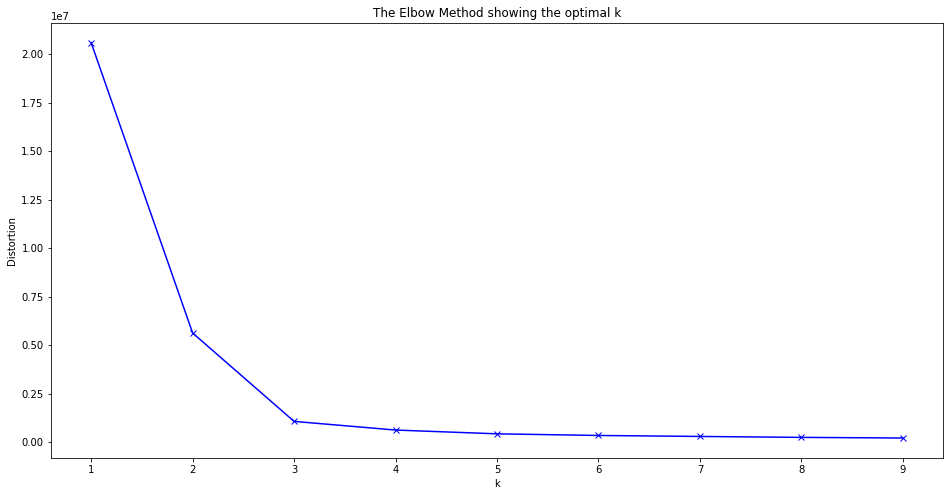

In [6]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(np_sequences[0])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
print(collections.Counter(kmeans.labels_))

Counter({2: 22022, 0: 18228, 1: 17392})


In [20]:
centroids=kmeans.cluster_centers_